In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.utils import shuffle
import os
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [3]:
BATCH_SIZE = 32
IMAGE_SIZE = 128
CHANNELS=3
EPOCHS=50

In [8]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
  "./data",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)
class_names = dataset.class_names
print(class_names)

Found 7553 files belonging to 2 classes.
['with_mask', 'without_mask']


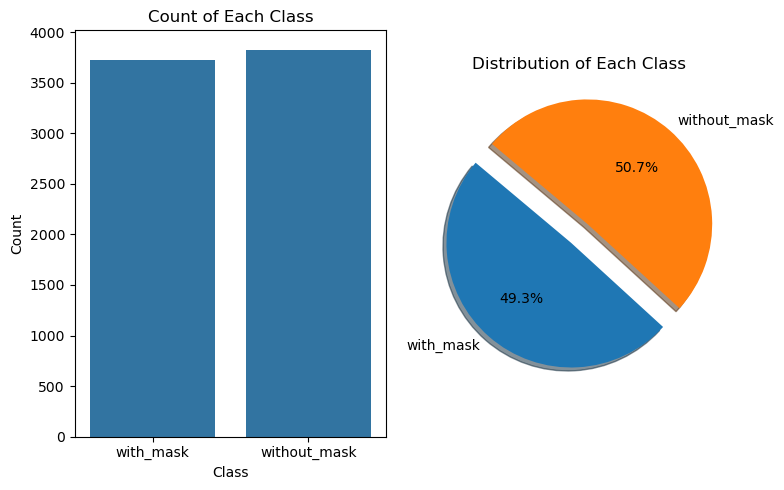

In [12]:
# Function to get all labels from a TensorFlow dataset
def get_all_labels(ds):
    labels = []
    for images_batch, labels_batch in ds:
        if isinstance(labels_batch, tf.Tensor):
            labels.extend(labels_batch.numpy())
        else:
            print("Unexpected format in labels_batch:", type(labels_batch))
    return labels

# Get all labels from the dataset
labels = get_all_labels(dataset)

# Count the occurrences of each class
class_counts = {class_name: 0 for class_name in class_names}
for label in labels:
    class_counts[class_names[label]] += 1

# Create a DataFrame for visualization
df = pd.DataFrame(list(class_counts.items()), columns=['Class', 'Count'])

# Set up the subplots
fig, axes = plt.subplots(1, 2, figsize=(8,5))

# Create count plot using seaborn
sns.barplot(x='Class', y='Count', data=df, ax=axes[0])
axes[0].set_title('Count of Each Class')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')

# Create pie chart using matplotlib
axes[1].pie(df['Count'], labels=df['Class'], autopct='%1.1f%%', startangle=140, shadow=True, explode=[0.1]*len(df))
axes[1].set_title('Distribution of Each Class')

# Show the plots
plt.tight_layout()
plt.show()

In [13]:
import plotly.express as px
import plotly.graph_objects as go
import tensorflow as tf
from tensorflow.keras import layers, models
from plotly.subplots import make_subplots
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
import plotly.offline as pyo
from IPython.display import display
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

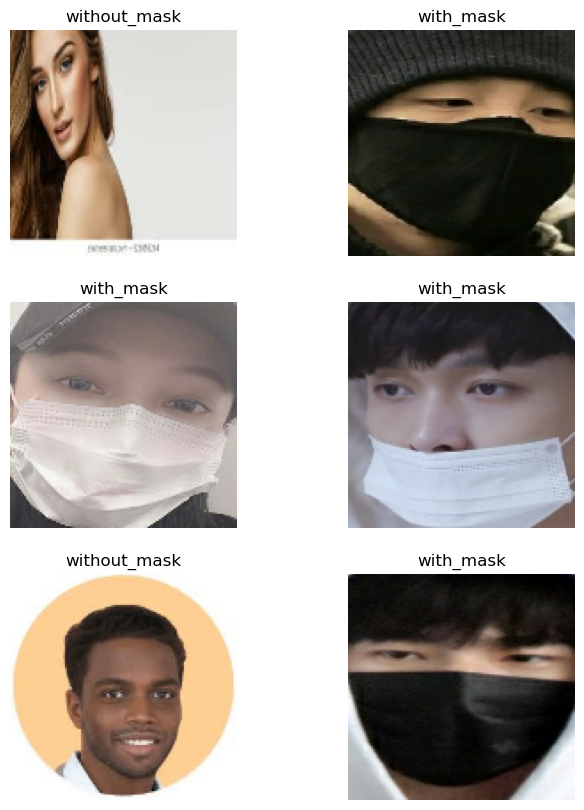

In [15]:
plt.figure(figsize=(8, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(6):
        ax = plt.subplot(3,2, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off") 

In [19]:
import cv2
# Initialize empty lists to store the information
sizes = []
resolutions = []
color_distributions = []

for dirpath, dirnames, filenames in os.walk(r"./data"):
    for filename in filenames:
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            # Load the image file using OpenCV
            img_path = os.path.join(dirpath, filename)
            img = cv2.imread(img_path)

            # Extract the size of the image
            size = os.path.getsize(img_path)
            sizes.append(size)

            # Extract the resolution of the image
            resolution = img.shape[:2]
            resolutions.append(resolution)

            # Extract the color distribution of the image
            color_distribution = np.bincount(img.flatten(), minlength=256)
            color_distributions.append(color_distribution)

# Convert the lists to numpy arrays for easier manipulation
sizes = np.array(sizes)
resolutions = np.array(resolutions)
color_distributions = np.array(color_distributions)

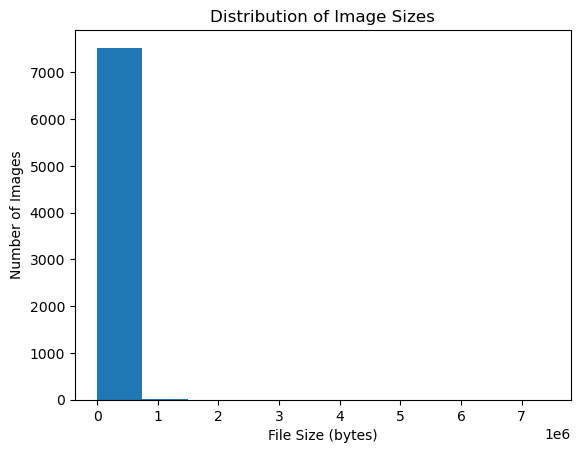

In [20]:
# Plot a histogram of the image sizes
plt.hist(sizes)
plt.title("Distribution of Image Sizes")
plt.xlabel("File Size (bytes)")
plt.ylabel("Number of Images")
plt.show()

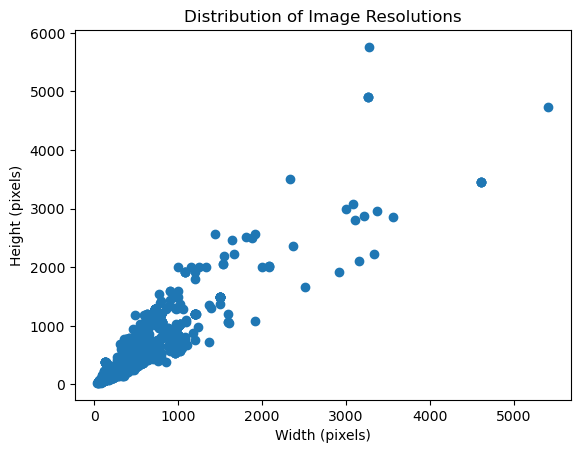

In [21]:
plt.scatter(resolutions[:, 0], resolutions[:, 1])
plt.title("Distribution of Image Resolutions")
plt.xlabel("Width (pixels)")
plt.ylabel("Height (pixels)")
plt.show()

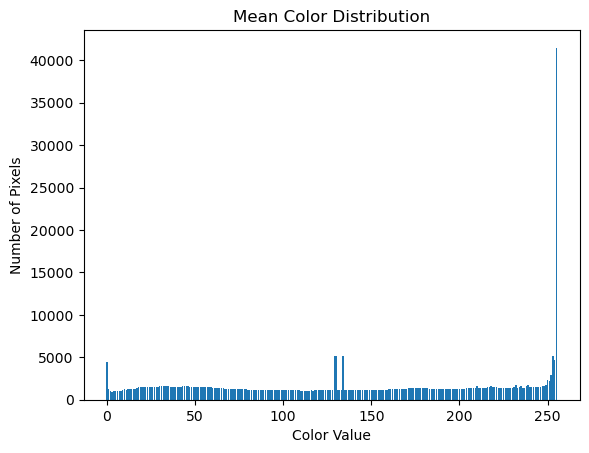

In [22]:
# Calculate the mean color distribution across all images
mean_color_distribution = np.mean(color_distributions, axis=0)

# Plot a bar chart of the mean color distribution
plt.bar(np.arange(256), mean_color_distribution)
plt.title("Mean Color Distribution")
plt.xlabel("Color Value")
plt.ylabel("Number of Pixels")
plt.show()